In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [147]:
print(tf.__version__)

2.5.0


In [148]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv(r'~/Escritorio/tia_actividad_002/car_evaluation.csv, header=None)

In [149]:
cars.shape

(1728, 7)

In [150]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
price           1728 non-null object
maint           1728 non-null object
doors           1728 non-null object
persons         1728 non-null object
lug_capacity    1728 non-null object
safety          1728 non-null object
output          1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [151]:
#   Muestro los 10 primeros registros del archivo
cars.head(10)

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [172]:
#   Resumen estadistico de los datos
cars.describe()

,price,maint,doors,persons,lug_capacity,safety,output
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [190]:
cars['price'].value_counts().sort_index()

high     432
low      432
med      432
vhigh    432
Name: price, dtype: int64

In [154]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

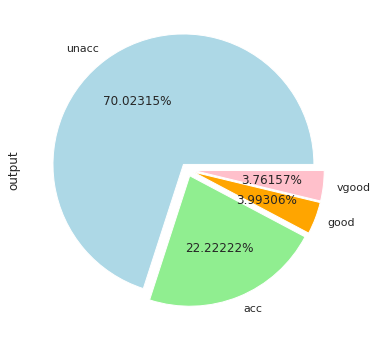

In [155]:
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

In [72]:
#   CONVIERTE SOLO 
#   Normalizar es poner a todas las variables numericas (solo) en un mismo rango (0 y 1), media de la variable sea cero y 
#   Desviacion estandar sea 1 
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

In [206]:
#X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)
X = pd.concat([maint, doors, persons, lug_capacity, safety] , axis=1)
print(price)

output  acc  good  unacc  vgood
price                          
high    108     0    324      0
low      89    46    258     39
med     115    23    268     26
vhigh    72     0    360      0


In [207]:
labels.head()

,condition_acc,condition_good,condition_unacc,condition_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [208]:
#y = cars.output
#print(y)
#   price, maint, doors, persons, lug_capacity, safety
maint.shape

(1728, 4)

In [212]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.20, random_state=42)

In [213]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [216]:
input_layer = Input(shape=(X_train.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[0], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [217]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print( '%s: %f (%f)' % ( name, cv_results.mean(), cv_results.std() ) )

LR: 0.819815 (0.029104)
CART: 0.748170 (0.044959)


In [219]:
print(model)

DecisionTreeClassifier()


In [223]:
history = model.fit(X_train, y_train)

In [228]:
#Predecidos correctamente, 73% de las fueron correctas, error del 27%
score = model.score(X_test, y_test)

print("Test Accuracy:", score)

Test Accuracy: 0.7312138728323699
